# Logistic Regression
applying regression on the given dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('Life Expectancy Data.csv')
df.head()
df.describe() 

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [3]:
categorical= df.select_dtypes(include= "O")
numerical= df.select_dtypes(exclude= "O")
categorical.describe()

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


In [4]:
numerical.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


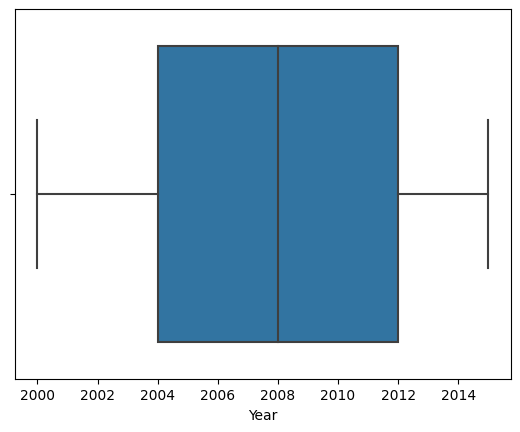

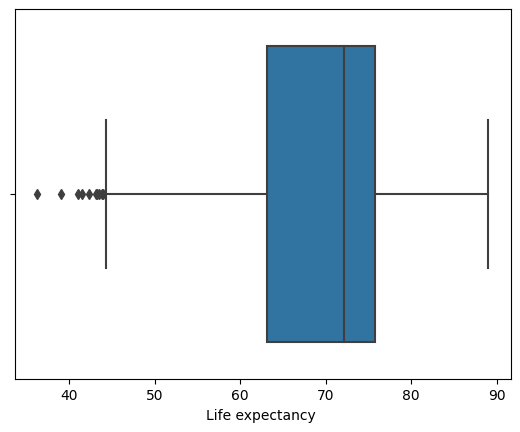

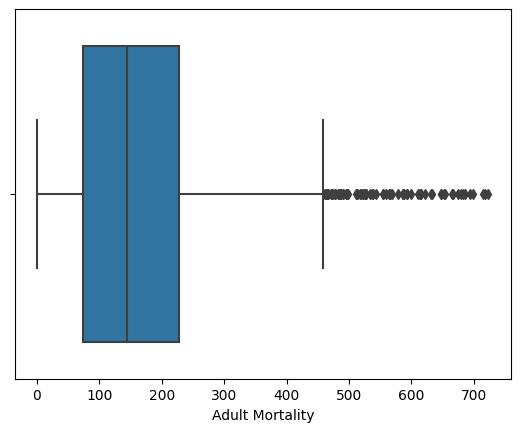

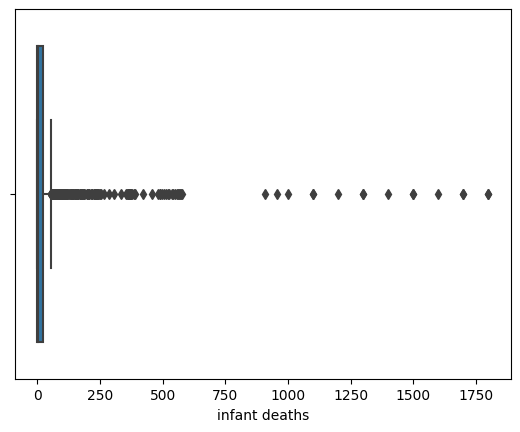

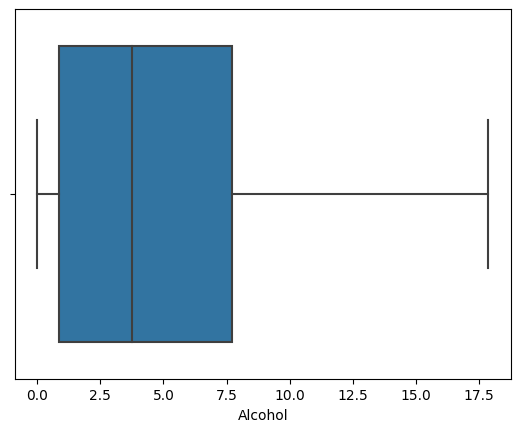

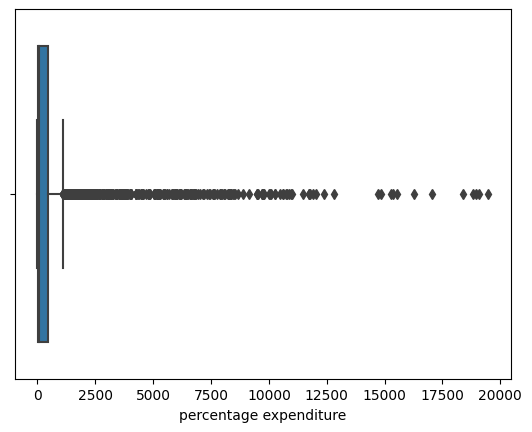

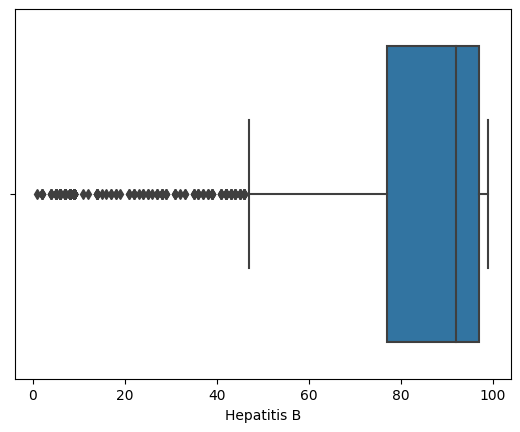

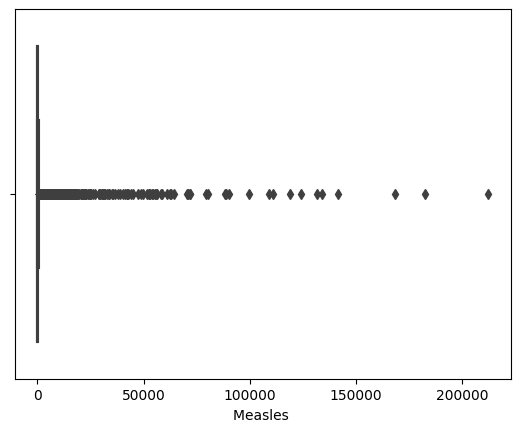

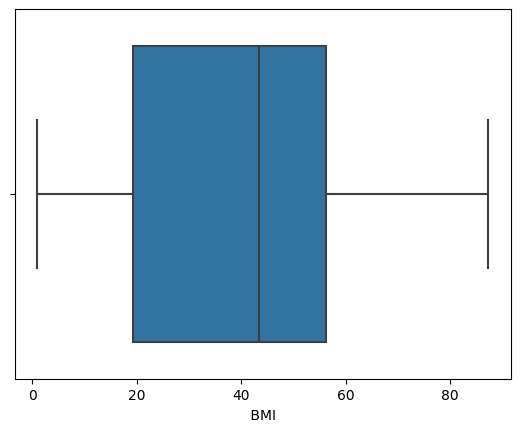

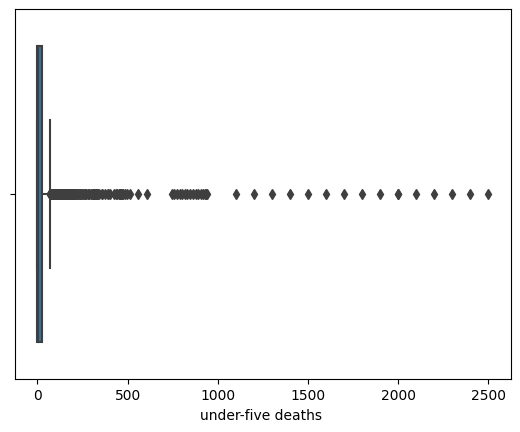

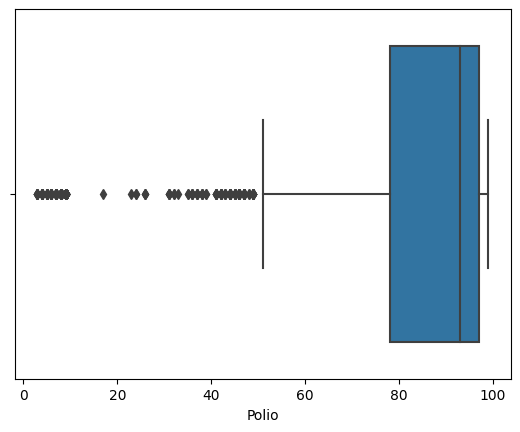

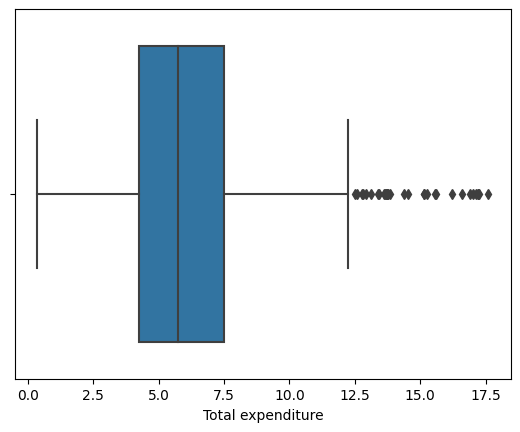

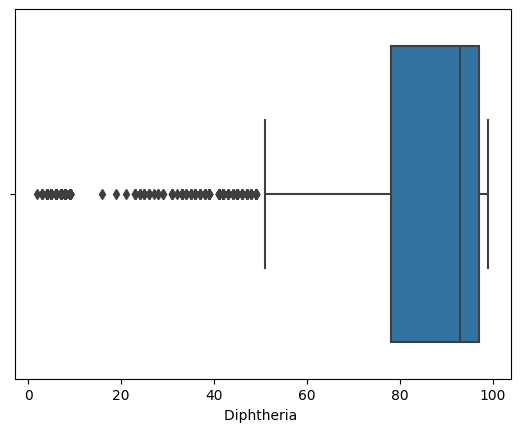

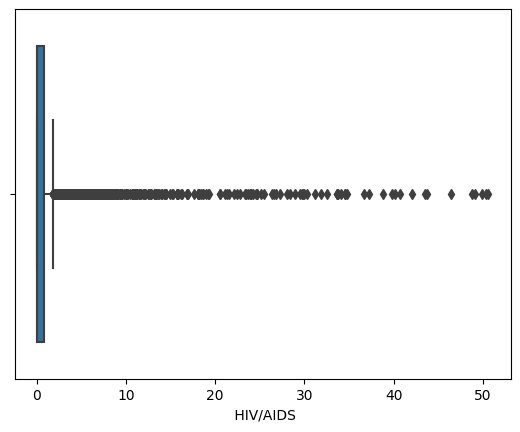

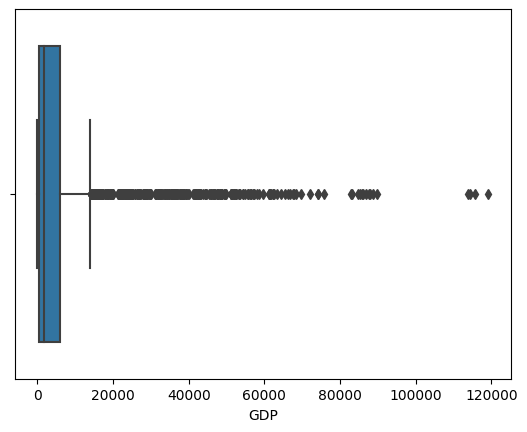

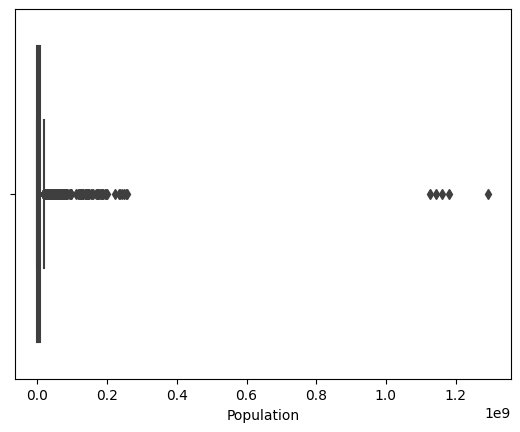

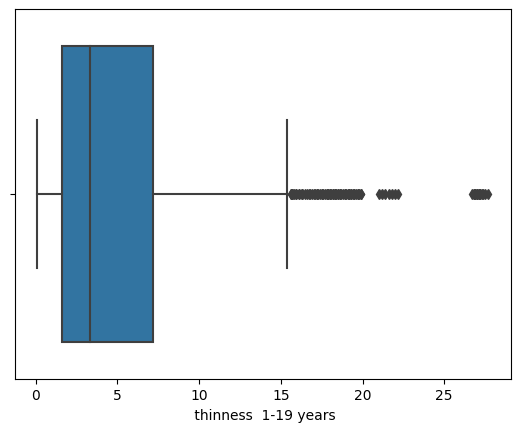

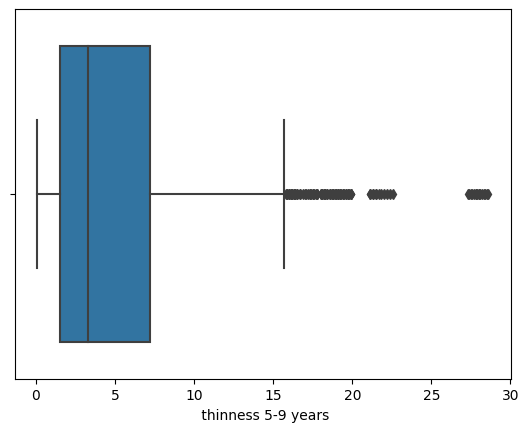

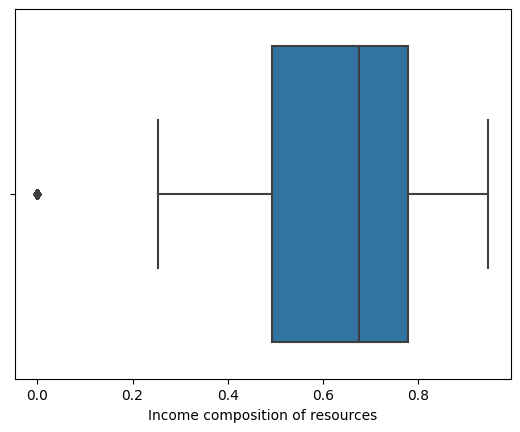

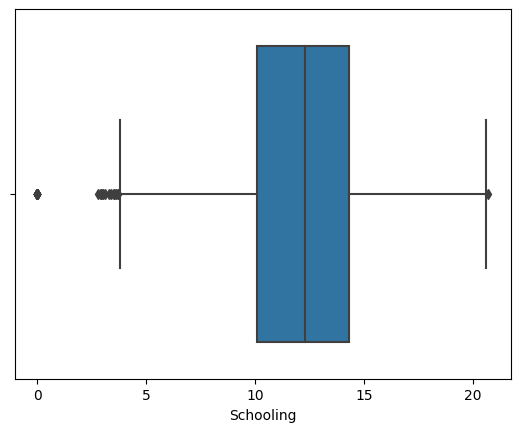

In [5]:
for feature in numerical.columns:
    sns.boxplot(x=numerical[feature])
    plt.show()

In [6]:
# TOP 10 COUNTRIES WITH MOST LIFE EXPECTANCY
df.groupby("Country").agg({
    "Life expectancy ":"mean"
}).reset_index().sort_values("Life expectancy ", ascending = False).head(10)

,Country,Life expectancy
84,Japan,82.53750
165,Sweden,82.51875
75,Iceland,82.44375
166,Switzerland,82.33125
60,France,82.21875
82,Italy,82.18750
160,Spain,82.06875
7,Australia,81.81250
125,Norway,81.79375
30,Canada,81.68750


In [7]:
# TOP 10 COUNTRIES WITH LEAST LIFE EXPECTANCY
df.groupby("Country").agg({
    "Life expectancy ":"mean"
}).reset_index().sort_values("Life expectancy ", ascending = True).head(10)

,Country,Life expectancy
152,Sierra Leone,46.11250
31,Central African Republic,48.51250
94,Lesotho,48.78125
3,Angola,49.01875
100,Malawi,49.89375
32,Chad,50.38750
44,Côte d'Ivoire,50.38750
192,Zimbabwe,50.48750
164,Swaziland,51.32500
123,Nigeria,51.35625


In [8]:
y= df["Life expectancy "]
X=  df.drop(["Life expectancy "], axis=1)
y.fillna(y.median(), inplace=True)
X.fillna(X.mean(), inplace=True)

X.drop([ 'Status', 'Population'], axis=1, inplace= True)
X.Year = pd.to_datetime(X.Year).dt.year

import category_encoders as ce
bin_enc = ce.BinaryEncoder(drop_invariant=True)
X = bin_enc.fit_transform(X)

from sklearn.preprocessing import StandardScaler
sc= StandardScaler() 
X = sc.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.30, random_state=9)

In [10]:
from sklearn import preprocessing
from sklearn import utils

lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)

In [11]:
clf.fit(X = X_train, y = y_train)

LogisticRegression()

In [12]:
y_test = lab.fit_transform(y_test)

In [13]:
pred = clf.predict(X_test)
pred

array([216, 108, 246, 183, 258, 211, 190, 349, 282, 258, 293, 220, 290,
       193, 313,  68, 169, 179, 259, 237, 217, 303, 263, 244, 133, 244,
       323, 272, 343, 201, 323, 282,   9, 312, 226, 163, 283,  85, 269,
       272, 152, 252, 330, 350, 238, 131, 177, 302, 255, 259, 157, 220,
       302, 266, 328, 100, 261, 343, 203,  92, 261, 242, 278, 238, 126,
       310, 115, 271,   5, 135, 108,  93, 219, 272, 279, 235, 314,  47,
       126, 253, 205,  43, 241, 139, 281,  93, 243, 328, 135, 216, 185,
       257, 154, 264, 262, 158, 122, 258, 197,  90, 252, 328, 248, 269,
       109, 117, 328,  74, 137, 276, 349, 263, 159, 326,  92, 282, 261,
       189, 269, 258, 200, 318,  97, 116, 185, 212, 259, 258, 216, 219,
       183, 241, 151, 344, 339, 324, 185, 261, 324, 242, 155, 349, 298,
       282, 295, 281, 129, 252, 279, 252, 297, 302,  71, 291, 169, 182,
        90,  62,  10, 189, 294, 121, 269, 261, 135, 302,  90, 324, 268,
       100, 204, 238, 135, 242, 221, 263, 100, 100, 282, 210, 33

In [14]:
np.array(y_test)

array([156,  48, 178, 143, 221,  68, 146, 279, 189, 208, 277, 188, 251,
       149, 270,  47, 118, 141, 213, 144, 187, 268, 198, 204,  74, 151,
       297, 196, 263, 168, 300, 219,   2, 297, 196, 127, 211,  35, 237,
       204, 120, 227, 299, 275, 128,  93,  87, 242, 208, 243, 157, 174,
       300, 248, 252,  34, 203, 281, 161,  51, 197, 182, 228, 241, 137,
       285, 154, 248,   5, 119,  90,   9, 149, 224, 234, 195, 262,  17,
        67, 202, 181,  24, 199,  95, 243, 139, 210, 256, 155, 173, 214,
       204,  86, 256, 164, 118,  72, 213, 147,  59, 215, 292, 203, 276,
        60,  79, 297,  42,  71, 240, 285, 282, 216, 297,  69, 210, 188,
        99, 226, 222, 107, 285,  62,  96, 227, 192, 208, 221, 172, 166,
       151, 189, 103, 287, 285, 291, 224, 201, 280, 172, 197, 287, 208,
       206, 213, 238, 115, 150, 219, 232, 293, 262,  77, 240, 102, 209,
        76,  50,  11, 102, 262,  66, 230, 223, 119, 216,  71, 289, 127,
        89, 104, 194,  14, 211, 151, 228,  32,  92, 223, 116, 22

In [15]:
clf.score(X_train, y_train)

0.23054474708171208

In [16]:
clf.score(X_test, y_test)

0.009070294784580499